In [87]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append("../../../foggy-statslib")
import foggy_statslib.core as fsc

In [114]:
def _sim_px(
    er: float = 0.10,
    vol: float = 0.10,
    nyears: int = 50,
    nsims: int = 1_000,
) -> pd.DataFrame:
    rng = np.random.default_rng(seed=42)
    # logarithmic returns
    r = rng.normal(
        loc=er,
        scale=vol,
        size=(nsims, nyears),
    )
    r = pd.DataFrame(
        r,
        index=pd.Index(range(nsims), name="sim"),
        columns=pd.Index(range(nyears), name="year"),
    )
    r.loc[:, 0] = 0
    px = np.exp(r.cumsum(axis="columns"))
    # geometric
    px = (1 + r.clip(lower=-1)).cumprod(axis="columns")
    return px

px_aggressive = _sim_px(er=0.10, vol=0.15)
px_conservative = _sim_px(er=0.05, vol=0.05)
avg = pd.DataFrame(
    {
        "aggressive": px_aggressive.median(),
        "conservative": px_conservative.median(),
    },
)

/var/folders/j1/k5f4073s6wj4tz_zy4ts1l0r0000gn/T/ipykernel_30716/2025537608.py:19: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  r.loc[:, 0] = 0
/var/folders/j1/k5f4073s6wj4tz_zy4ts1l0r0000gn/T/ipykernel_30716/2025537608.py:19: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  r.loc[:, 0] = 0


Min Aggressive (rsp Conservative) terminal wealth is $3.49 (rsp $3.79).
Aggressive (rsp Conservative) dips below $1 at some point in 36.60% (rsp 17.30%) of paths.
Aggressive (rsp Conservative) dips below 80c at some point in 6.60% (rsp 0.00%) of paths.


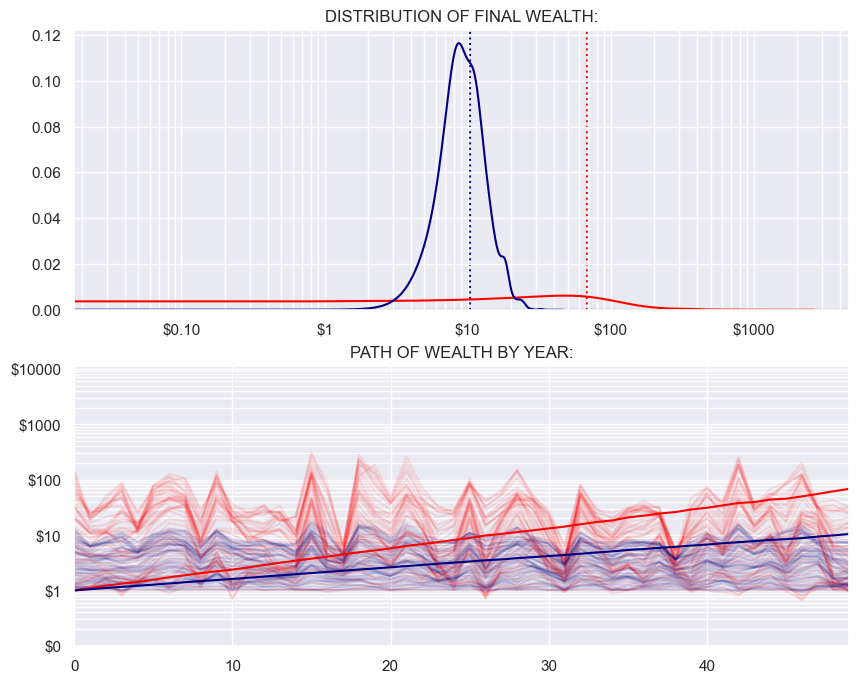

In [132]:
_, ax = plt.subplots(nrows=2)
# terminals
print(
    (
        "Min Aggressive (rsp Conservative) terminal wealth is "
        + f"""${px_aggressive.iloc[:, -1].min() :.2f} """
        + f"""(rsp ${px_conservative.iloc[:, -1].min() :.2f})."""
    )
)
fsc.plot(
    px_aggressive.iloc[:, -1],
    kind="density",
    color="red",
    axvline_locs=[px_aggressive.iloc[:, -1].median()],
    axvline_styles=[":"],
    axvline_colors=["red"],
    ax=ax[0],
)
fsc.plot(
    px_conservative.iloc[:, -1],
    kind="density",
    color="navy",
    axvline_locs=[px_conservative.iloc[:, -1].median()],
    axvline_styles=[":"],
    axvline_colors=["navy"],
    title="DISTRIBUTION OF FINAL WEALTH:",
    ylim_bottom=0,
    logx=True,
    xlim_left=0,
    xticklabels_fmt=lambda x, _: f"${x:.2f}" if x < 0.99 else f"${x:.0f}",
    xlabel="",
    ax=ax[0],
)
# paths
print(
    (
        "Aggressive (rsp Conservative) dips below $1 at some point in "
        + f"""{(px_aggressive.min(axis="columns") < 1).mean():.2%} """
        + f"""(rsp {(px_conservative.min(axis="columns") < 1).mean():.2%}) of paths."""
    )
)
print(
    (
        "Aggressive (rsp Conservative) dips below 80c at some point in "
        + f"""{(px_aggressive.min(axis="columns") < 0.80).mean():.2%} """
        + f"""(rsp {(px_conservative.min(axis="columns") < 0.80).mean():.2%}) of paths."""
    )
)
fsc.plot(
    px_aggressive,
    color="red",
    alpha=0.10,
    ax=ax[1],
)
fsc.plot(
    px_conservative,
    color="navy",
    alpha=0.10,
    ax=ax[1],
)
fsc.plot(
    avg,
    color=["red", "navy"],
    title="PATH OF WEALTH BY YEAR:",
    yticklabels_fmt=lambda y, _: f"${y:.0f}",
    ylim_bottom=0.10,
    logy=True,
    xlabel="",
    legend=False,
    figsize=(10, 8),
    ax=ax[1],
)
# show
plt.show()